<a href="https://colab.research.google.com/github/Rkjha6634/Flight-fare-predction-EDA/blob/main/Flight_Fare_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [121]:
data  = pd.read_excel('/content/flight_price.xlsx')
df = pd.DataFrame(data)


In [122]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [124]:
df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [125]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], infer_datetime_format = True)

In [126]:
df['Journey_Day'] = df["Date_of_Journey"].dt.day
df['Journey_Month'] = df["Date_of_Journey"].dt.month

In [127]:
df.drop('Date_of_Journey',axis = 1 ,inplace = True)

In [128]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [129]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [130]:
df["Dep_hour"]= df["Dep_Time"].str.split(":").str[0]
df["Dep_Minute"] = df["Dep_Time"].str.split(":").str[1]

df.drop("Dep_Time", axis=1,inplace=True)

In [131]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [132]:
df["Arrival_Time"] = df["Arrival_Time"].str.split(" ").str[0]

In [133]:
df["Arrival_hour"] = df["Arrival_Time"].str.split(":").str[0]
df["Arrival_minute"] = df["Arrival_Time"].str.split(":").str[1]

df.drop("Arrival_Time", axis=1,inplace=True)

In [134]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [135]:
df["Duration_hour"] = df["Duration"].str.split(" ").str[0].str.split("h").str[0]
df["Duration_minutes"] = df["Duration"].str.split(" ").str[1].str.split("m").str[0]

df.drop("Duration", axis=1,inplace=True)

In [136]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,01,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,09,25,04,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [137]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [138]:
df.drop(['Route', 'Additional_Info'],axis = 1 , inplace =True)

In [139]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,01,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,09,25,04,25,19,NaN
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [140]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            1
Price                  0
Journey_Day            0
Journey_Month          0
Dep_hour               0
Dep_Minute             0
Arrival_hour           0
Arrival_minute         0
Duration_hour          0
Duration_minutes    1032
dtype: int64

In [141]:
df['Duration_minutes'] = df['Duration_minutes'].fillna(0)

In [142]:
df.dropna(inplace = True)

In [143]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Journey_Day         0
Journey_Month       0
Dep_hour            0
Dep_Minute          0
Arrival_hour        0
Arrival_minute      0
Duration_hour       0
Duration_minutes    0
dtype: int64

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Total_Stops       10682 non-null  object
 4   Price             10682 non-null  int64 
 5   Journey_Day       10682 non-null  int64 
 6   Journey_Month     10682 non-null  int64 
 7   Dep_hour          10682 non-null  object
 8   Dep_Minute        10682 non-null  object
 9   Arrival_hour      10682 non-null  object
 10  Arrival_minute    10682 non-null  object
 11  Duration_hour     10682 non-null  object
 12  Duration_minutes  10682 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [145]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,01,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,09,25,04,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [146]:
df['Dep_hour'] = df['Dep_hour'].astype(np.int64)

In [147]:
df['Dep_Minute'] = df['Dep_Minute'].astype(np.int64)

In [148]:
df['Arrival_hour'] = df['Arrival_hour'].astype(np.int64)

In [149]:
df['Arrival_minute']= df['Arrival_minute'].astype(np.int64)

In [150]:
df['Duration_hour'].value_counts()   ###= df['Duration_hour'].astype(np.int64)

2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     264
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
35       7
36       7
31       6
47       2
42       2
39       2
5m       1
41       1
40       1
Name: Duration_hour, dtype: int64

In [151]:
df['Duration_hour'] = df['Duration_hour'].replace({'5m' : '5'})

In [154]:
df['Duration_hour'] = df['Duration_hour'].astype(np.int64)

In [155]:
df['Duration_minutes'] = df['Duration_minutes'].astype(np.int64)

In [156]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Total_Stops       10682 non-null  object
 4   Price             10682 non-null  int64 
 5   Journey_Day       10682 non-null  int64 
 6   Journey_Month     10682 non-null  int64 
 7   Dep_hour          10682 non-null  int64 
 8   Dep_Minute        10682 non-null  int64 
 9   Arrival_hour      10682 non-null  int64 
 10  Arrival_minute    10682 non-null  int64 
 11  Duration_hour     10682 non-null  int64 
 12  Duration_minutes  10682 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [159]:
num_col = [col for col in df.columns if df[col].dtype != 'O']
cat_col = [col for col in df.columns if df[col].dtype == 'O']
print("numerical_features", num_col)
print("categorical_features", cat_col)

numerical_features ['Price', 'Journey_Day', 'Journey_Month', 'Dep_hour', 'Dep_Minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour', 'Duration_minutes']
categorical_features ['Airline', 'Source', 'Destination', 'Total_Stops']


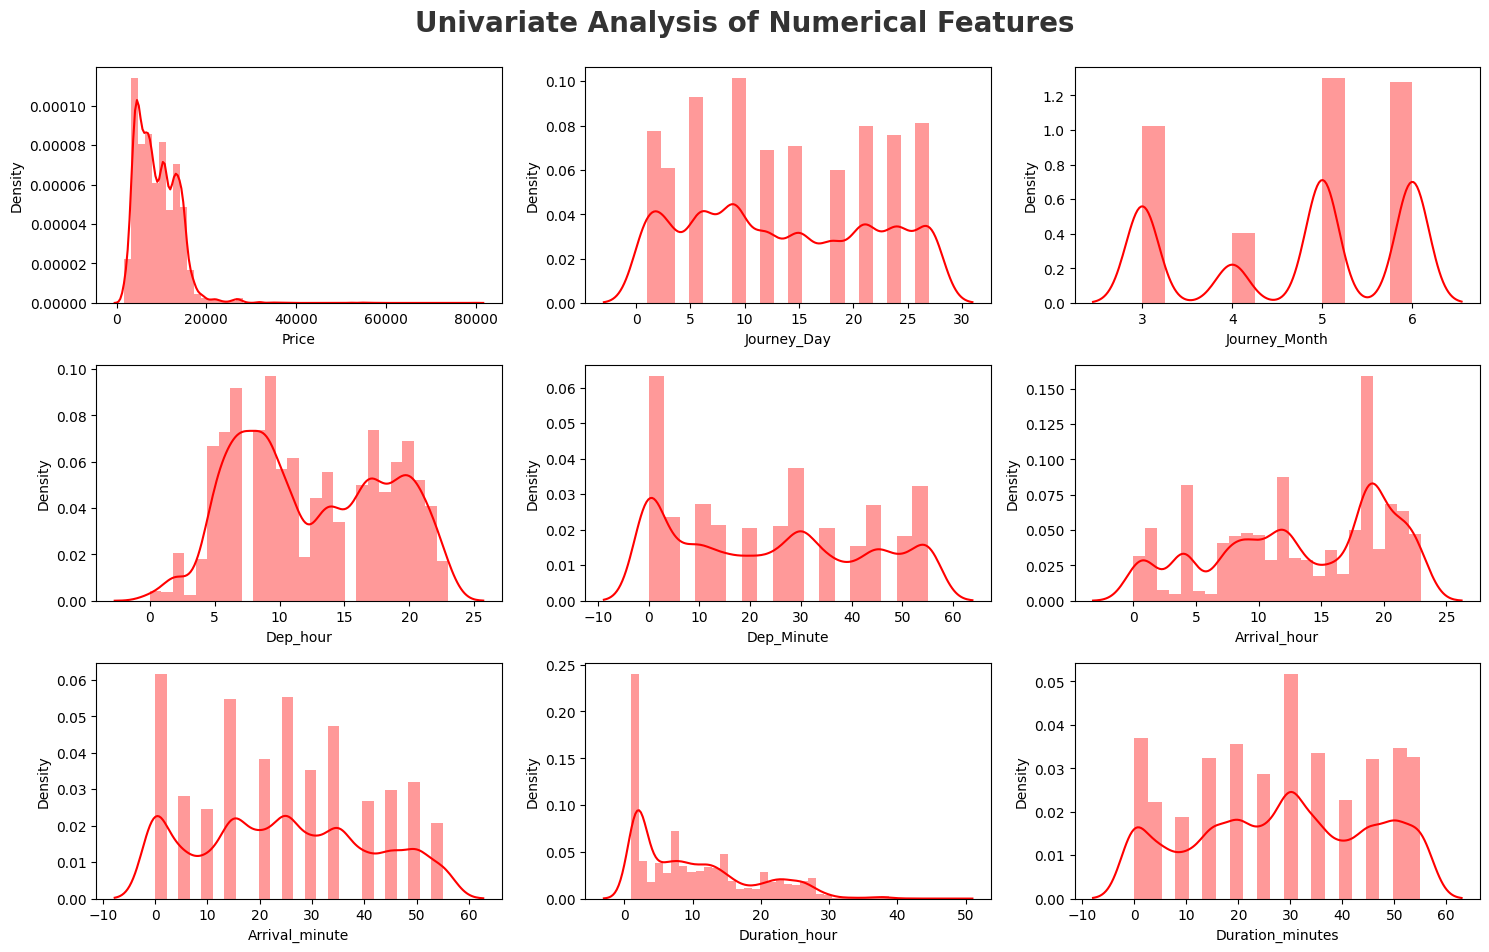

In [163]:
try:
  plt.figure(figsize=(15, 15))
  plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

  for i in range(0,len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.distplot(x = df[num_col[i]] , color = 'r')
    plt.xlabel(num_col[i])
    plt.tight_layout()

except Exception as e:
    print(e)



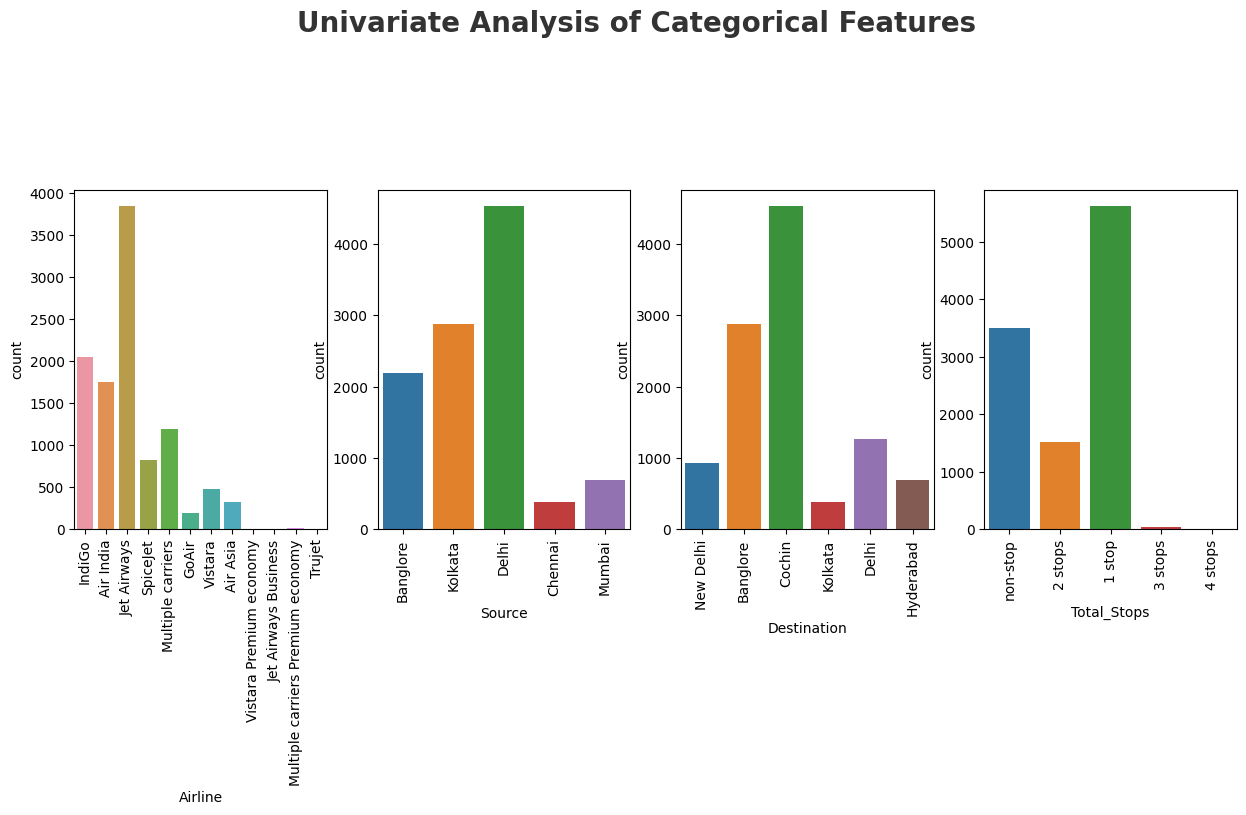

In [167]:
try:
  plt.figure(figsize=(15, 15))
  plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

  for i in range(0,len(cat_col)):
    plt.subplot(3, 4, i+1)
    sns.countplot(x = df[cat_col[i]] )
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=90)

except Exception as e:
    print(e)

In [168]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [171]:
Airline_avg_price = df.groupby('Airline')['Price'].mean().reset_index()
Airline_avg_price = Airline_avg_price.sort_values(by='Price', ascending=False)
Airline_avg_price

,Airline,Price
5,Jet Airways Business,58358.666667
4,Jet Airways,11643.923357
7,Multiple carriers Premium economy,11418.846154
6,Multiple carriers,10902.678094
1,Air India,9612.427756
11,Vistara Premium economy,8962.333333
10,Vistara,7796.348643
2,GoAir,5861.056701
3,IndiGo,5673.682903
0,Air Asia,5590.260188


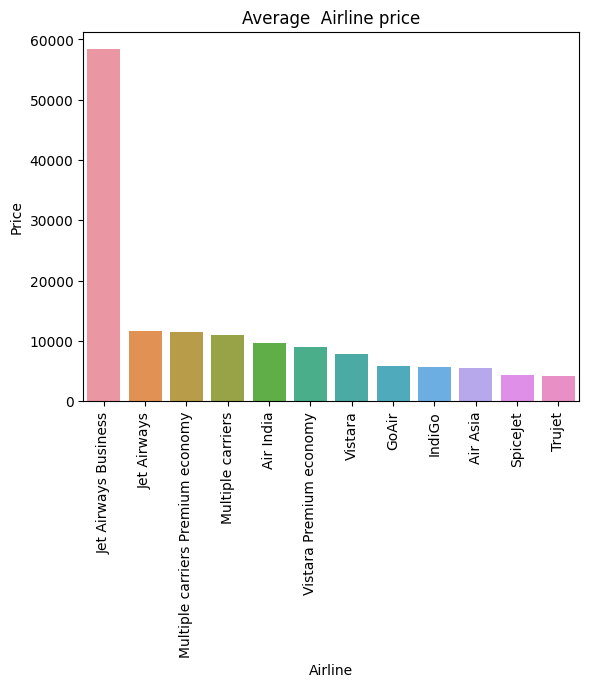

In [172]:
sns.barplot(data =Airline_avg_price , x = 'Airline' , y = 'Price')
plt.title('Average  Airline price')
plt.xticks(rotation = 90 )
plt.show()

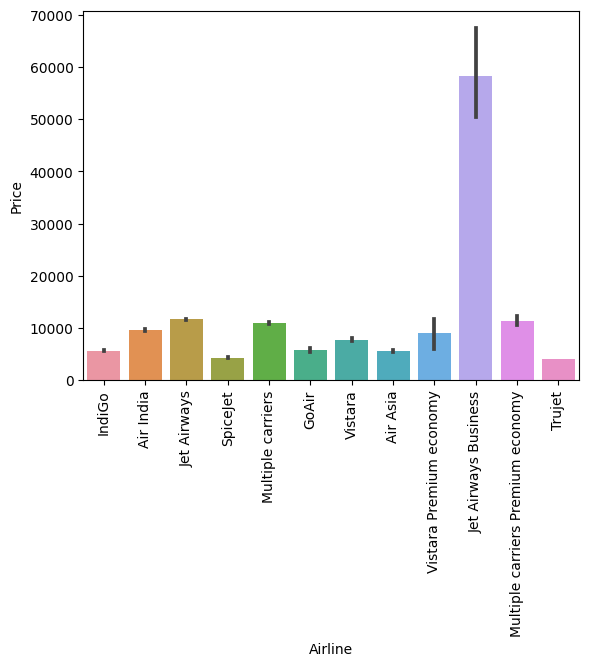

In [173]:
sns.barplot(data = df, x = "Airline", y = "Price")
plt.xticks(rotation=90)
plt.show()

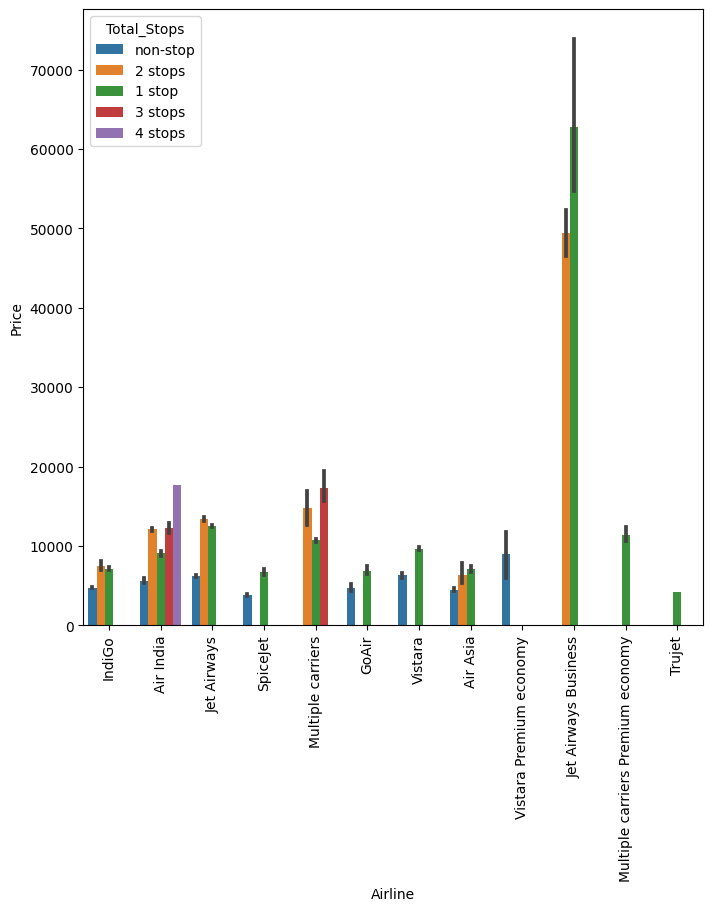

In [174]:
plt.figure(figsize=(8, 8))
sns.barplot(data = df, x="Airline", y = "Price", hue = "Total_Stops")
plt.xticks(rotation=90)
plt.show()

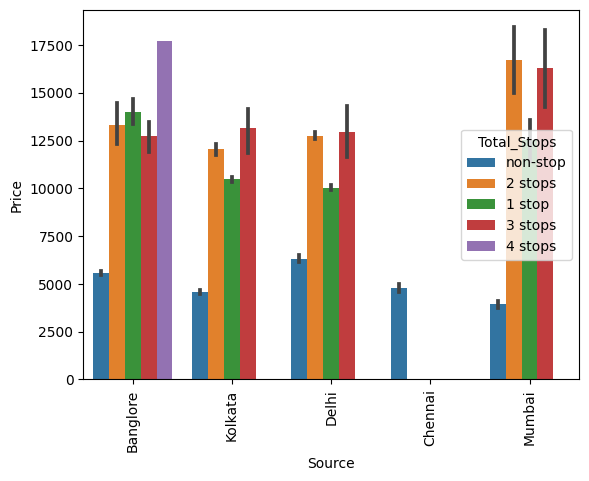

In [176]:
sns.barplot(data = df, x="Source", y = "Price", hue = "Total_Stops")
plt.xticks(rotation=90)
plt.show()

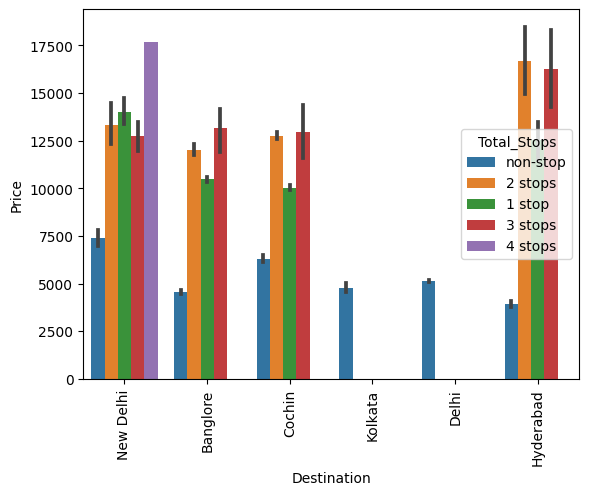

In [177]:
sns.barplot(data = df, x="Destination", y = "Price", hue = "Total_Stops")
plt.xticks(rotation=90)
plt.show()

In [178]:
total_Stops = df.groupby(["Total_Stops"])["Price"].mean().sort_values(ascending = False).reset_index()

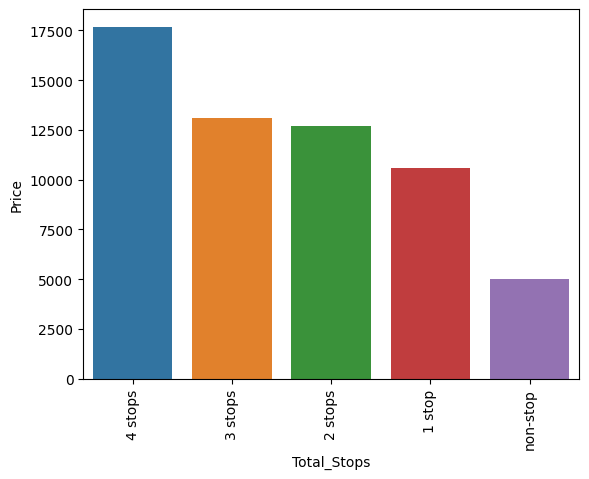

In [179]:
sns.barplot(data = total_Stops, x = "Total_Stops", y = "Price")
plt.xticks(rotation=90)
plt.show()

In [181]:
avg_time = df.groupby(['Source' , 'Destination'])['Duration_hour'].mean().reset_index()
avg_time

,Source,Destination,Duration_hour
0,Banglore,Delhi,2.221344
1,Banglore,New Delhi,10.356223
2,Chennai,Kolkata,2.000000
3,Delhi,Cochin,13.209436
4,Kolkata,Banglore,11.975618
5,Mumbai,Hyderabad,2.750359


In [188]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [190]:
Month_avg_price = df.groupby('Journey_Month')['Price'].mean().reset_index()
Month_avg_price

,Journey_Month,Price
0,3,10673.205580
1,4,5770.847081
2,5,9127.722944
3,6,8828.796134


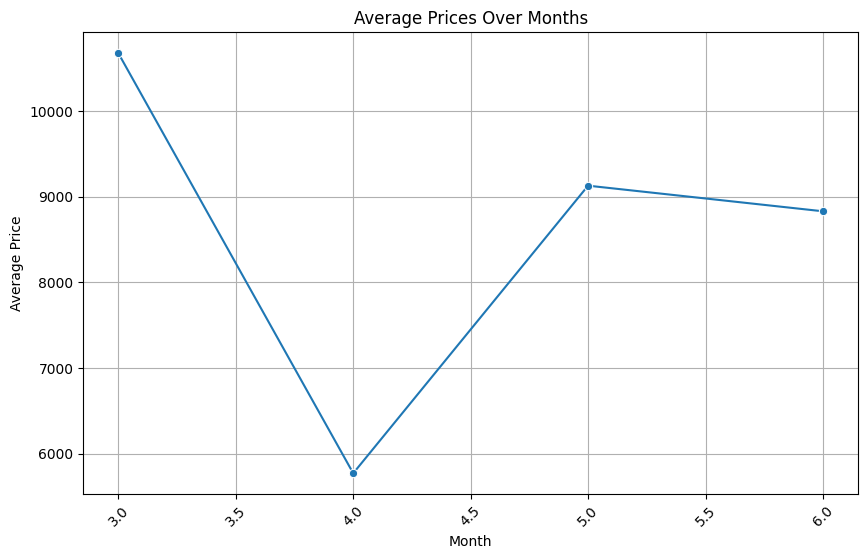

In [192]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Journey_Month', y='Price', data=Month_avg_price, marker='o')
plt.title('Average Prices Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [194]:
cat_col

['Airline', 'Source', 'Destination', 'Total_Stops']

In [195]:
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [196]:
Source =df[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [197]:
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [198]:
df["Total_Stops"] = df["Total_Stops"].map({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4})

In [199]:
new_df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [200]:
new_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [201]:
new_df.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [202]:
new_df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
